# Project Title: Price model for airbnb listings in Geneva

## ANOVA and regressions

### Libraries and settings

In [12]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/project_arm_airbnb/data


### Import data from csv

In [13]:
# Import data from csv file 'listings_with_distances.csv'
df = pd.read_csv('analysis.csv')
print(df.shape)
df.head()

(1813, 20)


,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,0,22,409.552941,120.893645,4,3
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,0,51,375.547668,465.095061,1,0
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26,564.152315,460.109880,0,0
3,276025,Other,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48,6694.037169,162.973109,0,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26,795.419536,127.984620,0,2


### Create grouped box plot

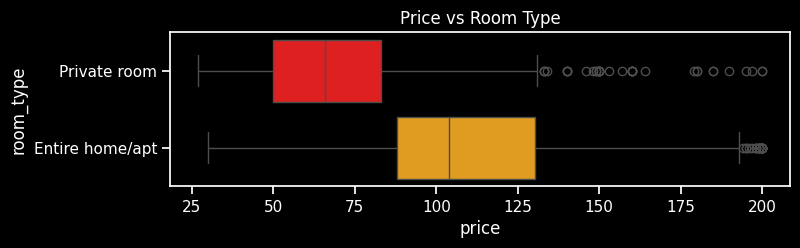

In [25]:
# Plot boxplot with price and room_type
plt.figure(figsize=(8, 2))
sns.boxplot(x='price', y='room_type', palette= ['red', 'orange'], data=df, orient='h')
plt.title('Price vs Room Type')
plt.show()


### Unpaired two-sample t-test

In [28]:
# create subsets for each room type
entire_home = df[df['room_type'] == 'Entire home/apt']
private_room = df[df['room_type'] == 'Private room']

# create t-test
t_test = stats.ttest_ind(entire_home['price'], private_room['price'])
print('Test-statistic:', t_test[0].round(5), 'p-value',  t_test[1].round(5))

Test-statistic: 23.41067 p-value 0.0


<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices differ between the room types of an 'Entire home/apt' and 'private room'. Hence, there is a statistically significant (5% significance level) difference between prices of the two room types. Based on the boxplot Price vs Room Type we can also infer that 'Entire home/apt' are more expensive than 'private room'. </p>

## Analysis of Variance (ANOVA)

In [29]:
# create ANOVA based on the subsets entire_home and private_room
fvalue, pvalue = stats.f_oneway(entire_home['price'],
                                private_room['price'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))


F-value: 548.06 p-value 0.0


<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices of 'Entire home/apt' and 'private room'differ.</p>

In [33]:
# create a subset of prices for each neighbourhood in the variable 'neighbourhood_cleansed'
neighbourhoods = df['neighbourhood_cleansed'].unique()
print(neighbourhoods)

# Create subsets for each specific neighbourhood
cdg = df.loc[df['neighbourhood_cleansed'] == 'Commune de Genève']
car = df.loc[df['neighbourhood_cleansed'] == 'Carouge']
gs = df.loc[df['neighbourhood_cleansed'] == 'Grand-Saconnex']
lan = df.loc[df['neighbourhood_cleansed'] == 'Lancy']
ver = df.loc[df['neighbourhood_cleansed'] == 'Vernier']

# create ANOVA based on the subsets cdg, car, gs, lan and ver
fvalue, pvalue = stats.f_oneway(cdg['price'],
                                car['price'],
                                gs['price'],
                                lan['price'],
                                ver['price'])
# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

['Commune de Genève' 'Other' 'Carouge' 'Grand-Saconnex' 'Lancy' 'Vernier']
F-value: 9.371 p-value 0.0


<p> Because the p-value is lower than 0.05, the null hypothesis can be rejected, i.e. there is evidence that the prices in each specific neighbourhood is different. A further analysis based on the room_types per neighbourhood is difficult due to the limited amount of listings. The number of listings decrease in this case to 15 as shown in the pivot table in '3_EDA'.</p>

### Additional analysis based on ANOVA of neighbourhoods

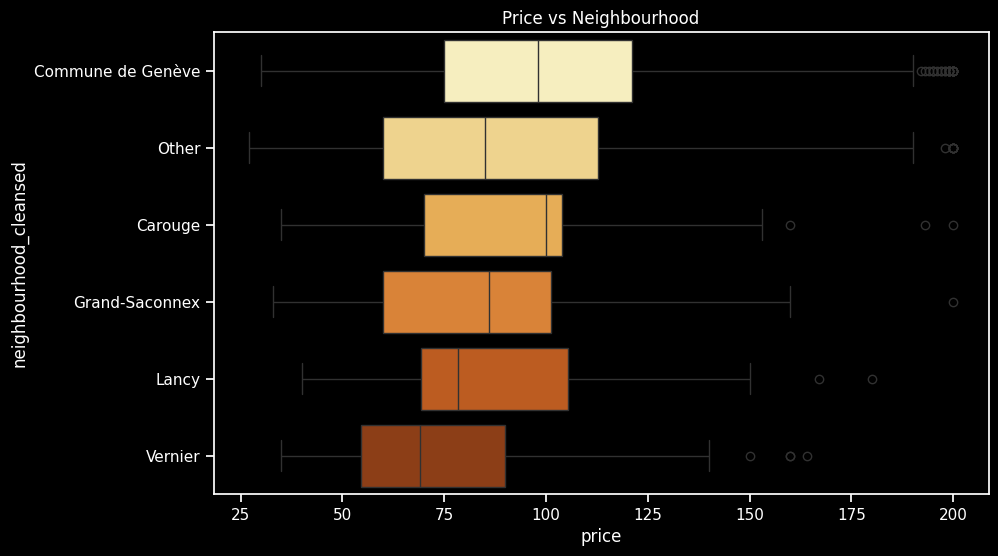

In [44]:
# create boxplot for the neighbourhoods and exclude the neighourhood 'others'
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', y='neighbourhood_cleansed', data=df, palette='YlOrBr')
plt.title('Price vs Neighbourhood')
plt.show()

## Multiple linear regression

## Regression tree or random forest regression

### (5) Use of multiple linear regression, regression tree or random forest regression as the modeling method.
### (6) Model evaluation using suitable measures of fit (e.g. r-squared, rmse).
### (7) Correct interpretation of model results and measures of fit.